In [1]:
import time
start = time.time()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
baseball = pd.read_csv('baseball.csv')
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
#Convert 'Team' variable to numeric variable

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en = baseball.iloc[:,0].values

In [5]:
X_en =labelencoder.fit_transform(X_en)
X_en

array([ 1,  2,  3, ..., 31, 32, 37])

In [6]:
X = baseball
X['Team'] = X_en
y = baseball.iloc[:,0].values

In [7]:
full_baseball = X.copy()
full_baseball['Team'] = y
full_baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [8]:
#Convert 'League' variable to a numeric variable

X_e = full_baseball.iloc[:,1].values

In [9]:
X_e = labelencoder.fit_transform(X_e)
X_e

array([1, 1, 0, ..., 1, 1, 0])

In [10]:
Y = full_baseball
Y['League'] = X_e

In [11]:
full_baseball2 = Y.copy()
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [12]:
#Replace NA's in 'RankSeason' and 'RankPlayoffs' with 0

full_baseball2[['RankSeason', 'RankPlayoffs']] = full_baseball2[['RankSeason', 'RankPlayoffs']].fillna(0)
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,NaN,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,NaN,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,NaN,NaN


In [13]:
#Predict NA's for 'OOBP'

data_without_null = full_baseball2.dropna()
data_without_null

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [14]:
train_data_x = data_without_null.iloc[:,:13]
train_data_y = data_without_null.iloc[:,13]

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [16]:
test_data = full_baseball2.iloc[:,:13]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
full_baseball2.OOBP.fillna(test_data.OOBP, inplace = True)
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317000,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306000,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315000,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331000,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.340993,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.320679,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.324978,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.327632,NaN


In [17]:
#Round 'OOBP' to 3 decimals

full_baseball2['OOBP'] = full_baseball2['OOBP'].round(decimals = 3)
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,NaN


In [18]:
#Predict NA's for 'OSLG'

data2_without_null = full_baseball2.dropna()
data2_without_null

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [19]:
train2_data_x = data2_without_null.iloc[:,:14]
train2_data_y = data2_without_null.iloc[:,14]

In [20]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [21]:
test2_data = full_baseball2.iloc[:,:14]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
full_baseball2.OSLG.fillna(test2_data.OSLG, inplace = True)
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415000
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378000
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403000
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428000
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,0.417606
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,0.381686
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,0.412255
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,0.397784


In [22]:
full_baseball2['OSLG'] = full_baseball2['OSLG'].round(decimals = 3)
full_baseball2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,0.418
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,0.382
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,0.412
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,0.398


In [23]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#Split the features and target data

X = full_baseball2.drop('Playoffs', 1)
y = full_baseball2['Playoffs']

In [26]:
#Sequential Forward Selection using Linear Regression


sfs = sfs(LinearRegression(), k_features = 8, forward = True, floating = False, scoring = 'r2', cv = 0)

In [27]:
#Select the top 8 features

sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(8, 8),
                          scoring='r2')

In [28]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)",[0.83211235285391],0.832112,"(RankPlayoffs,)"
2,"(9, 10)",[0.858596148257184],0.858596,"(RankSeason, RankPlayoffs)"
3,"(5, 9, 10)",[0.8801426257932932],0.880143,"(W, RankSeason, RankPlayoffs)"
4,"(2, 5, 9, 10)",[0.8816191472693344],0.881619,"(Year, W, RankSeason, RankPlayoffs)"
5,"(2, 5, 9, 10, 11)",[0.881966454598214],0.881966,"(Year, W, RankSeason, RankPlayoffs, G)"
6,"(0, 2, 5, 9, 10, 11)",[0.8821834178398497],0.882183,"(Team, Year, W, RankSeason, RankPlayoffs, G)"
7,"(0, 2, 5, 7, 9, 10, 11)",[0.8822968117608856],0.882297,"(Team, Year, W, SLG, RankSeason, RankPlayoffs, G)"
8,"(0, 2, 5, 7, 9, 10, 11, 13)",[0.8826745511087678],0.882675,"(Team, Year, W, SLG, RankSeason, RankPlayoffs,..."


In [29]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


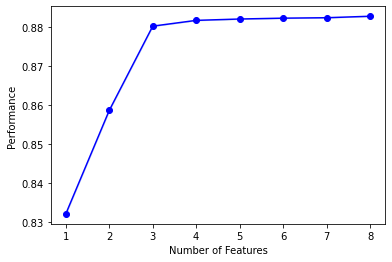

In [30]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

In [46]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

baseball_3 = full_baseball2.drop(['Year', 'Team', 'League', 'RankSeason', 'RankPlayoffs', 'G'], axis = 1)
baseball_3

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,0,0.341,0.418
1228,706,626,93,0.321,0.394,0.268,0,0.321,0.382
1229,878,690,103,0.341,0.441,0.278,1,0.325,0.412
1230,774,664,84,0.335,0.394,0.271,0,0.328,0.398


In [42]:
sfs1 = sfs(LinearRegression(), k_features = 8, forward = True, floating = False, scoring = 'r2', cv = 0)

In [43]:
X1 = baseball_3.drop('Playoffs', 1)
y1 = baseball_3['Playoffs']

In [44]:
sfs1.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(8, 8),
                          scoring='r2')

In [45]:
df_SFS1_results = pd.DataFrame(sfs1.subsets_).transpose()
df_SFS1_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.3803895539332304],0.38039,"(W,)"
2,"(2, 7)",[0.3910191914630582],0.391019,"(W, OSLG)"
3,"(1, 2, 7)",[0.3953347594873031],0.395335,"(RA, W, OSLG)"
4,"(1, 2, 6, 7)",[0.3961136436778566],0.396114,"(RA, W, OOBP, OSLG)"
5,"(1, 2, 3, 6, 7)",[0.39693061755015946],0.396931,"(RA, W, OBP, OOBP, OSLG)"
6,"(1, 2, 3, 5, 6, 7)",[0.39930981827406353],0.39931,"(RA, W, OBP, BA, OOBP, OSLG)"
7,"(1, 2, 3, 4, 5, 6, 7)",[0.4005450321667733],0.400545,"(RA, W, OBP, SLG, BA, OOBP, OSLG)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[0.4005516416384076],0.400552,"(RS, RA, W, OBP, SLG, BA, OOBP, OSLG)"


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


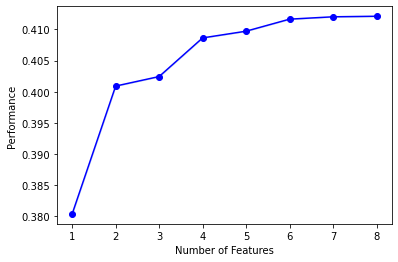

In [40]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

In [31]:
#Sequential Backward Selection using Linear Regression

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
sbs = sfs(LinearRegression(), k_features = 8, forward = False, floating = False, scoring = 'r2', cv = 0)

In [32]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(8, 8), scoring='r2')

In [33]:
df_SBS_results = pd.DataFrame(sbs.subsets_).transpose()
df_SBS_results

,feature_idx,cv_scores,avg_score,feature_names
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.8829596774187359],0.88296,"(Team, League, Year, RS, RA, W, OBP, SLG, BA, ..."
13,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.8829542146455128],0.882954,"(Team, Year, RS, RA, W, OBP, SLG, BA, RankSeas..."
12,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.8829517919437263],0.882952,"(Team, Year, RS, W, OBP, SLG, BA, RankSeason, ..."
11,"(0, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13)",[0.8829034187957661],0.882903,"(Team, Year, RS, W, OBP, SLG, RankSeason, Rank..."
10,"(0, 2, 3, 5, 7, 9, 10, 11, 12, 13)",[0.882814292319663],0.882814,"(Team, Year, RS, W, SLG, RankSeason, RankPlayo..."
9,"(0, 2, 5, 7, 9, 10, 11, 12, 13)",[0.8827683062806106],0.882768,"(Team, Year, W, SLG, RankSeason, RankPlayoffs,..."
8,"(0, 2, 5, 7, 9, 10, 11, 13)",[0.8826745511087678],0.882675,"(Team, Year, W, SLG, RankSeason, RankPlayoffs,..."


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


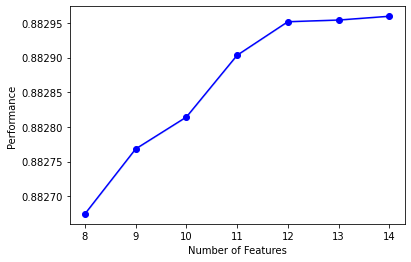

In [34]:
fig2 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

In [47]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)

baseball_3

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,0,0.341,0.418
1228,706,626,93,0.321,0.394,0.268,0,0.321,0.382
1229,878,690,103,0.341,0.441,0.278,1,0.325,0.412
1230,774,664,84,0.335,0.394,0.271,0,0.328,0.398


In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sbs1 = sfs(LinearRegression(), k_features = 1, forward = False, floating = False, scoring = 'r2', cv = 0)

In [52]:
sbs1.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(1, 1), scoring='r2')

In [53]:
df_SBS1_results = pd.DataFrame(sbs1.subsets_).transpose()
df_SBS1_results

,feature_idx,cv_scores,avg_score,feature_names
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[0.4005516416384076],0.400552,"(RS, RA, W, OBP, SLG, BA, OOBP, OSLG)"
7,"(1, 2, 3, 4, 5, 6, 7)",[0.4005450321667733],0.400545,"(RA, W, OBP, SLG, BA, OOBP, OSLG)"
6,"(1, 2, 3, 4, 5, 7)",[0.40012747698605267],0.400127,"(RA, W, OBP, SLG, BA, OSLG)"
5,"(1, 2, 3, 5, 7)",[0.3985998471189587],0.3986,"(RA, W, OBP, BA, OSLG)"
4,"(1, 2, 5, 7)",[0.39605567645500517],0.396056,"(RA, W, BA, OSLG)"
3,"(1, 2, 7)",[0.3953347594873031],0.395335,"(RA, W, OSLG)"
2,"(2, 7)",[0.3910191914630582],0.391019,"(W, OSLG)"
1,"(2,)",[0.3803895539332304],0.38039,"(W,)"


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


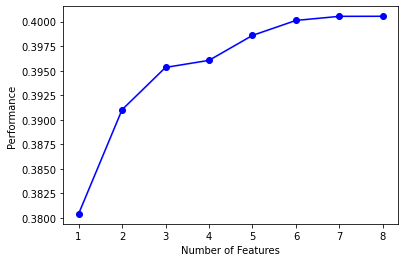

In [54]:
fig3 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')

In [55]:
#Sequential Forward Selection using KNN
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

sfs2 = sfs(KNeighborsClassifier(), k_features = 8, forward = True, floating = False, scoring = 'accuracy', cv = 4)

In [56]:
sfs2.fit(X, y)

SequentialFeatureSelector(cv=4, estimator=KNeighborsClassifier(),
                          k_features=(8, 8), scoring='accuracy')

In [57]:
df_SFS2_results = pd.DataFrame(sfs2.subsets_).transpose()
df_SFS2_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[1.0, 1.0, 1.0, 1.0]",1,"(RankSeason,)"
2,"(1, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, RankSeason)"
3,"(1, 6, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, RankSeason)"
4,"(1, 6, 7, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, RankSeason)"
5,"(1, 6, 7, 8, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason)"
6,"(1, 6, 7, 8, 9, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoffs)"
7,"(1, 6, 7, 8, 9, 10, 12)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."
8,"(1, 6, 7, 8, 9, 10, 12, 13)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."


In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

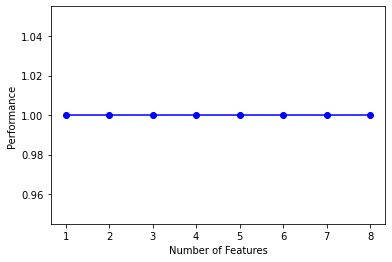

In [59]:
fig4 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

In [60]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)

baseball_3

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,0,0.341,0.418
1228,706,626,93,0.321,0.394,0.268,0,0.321,0.382
1229,878,690,103,0.341,0.441,0.278,1,0.325,0.412
1230,774,664,84,0.335,0.394,0.271,0,0.328,0.398


In [62]:
sfs3 = sfs(KNeighborsClassifier(), k_features = 8, forward = True, floating = False, scoring = 'accuracy', cv = 4)

In [64]:
sfs3.fit(X, y)

SequentialFeatureSelector(cv=4, estimator=KNeighborsClassifier(),
                          k_features=(8, 8), scoring='accuracy')

In [65]:
df_SFS3_results = pd.DataFrame(sfs3.subsets_).transpose()
df_SFS3_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[1.0, 1.0, 1.0, 1.0]",1,"(RankSeason,)"
2,"(1, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, RankSeason)"
3,"(1, 6, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, RankSeason)"
4,"(1, 6, 7, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, RankSeason)"
5,"(1, 6, 7, 8, 9)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason)"
6,"(1, 6, 7, 8, 9, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoffs)"
7,"(1, 6, 7, 8, 9, 10, 12)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."
8,"(1, 6, 7, 8, 9, 10, 12, 13)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."


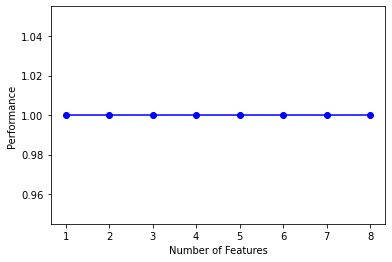

In [66]:
fig5 = plot_sfs(sfs3.get_metric_dict(), kind='std_dev')

In [86]:
#Backward Elimination using KNN

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

sfs4 = sfs(KNeighborsClassifier(), k_features = 8, forward = False, floating = False, scoring = 'accuracy', cv = 0)

In [87]:
sfs4.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(), forward=False,
                          k_features=(8, 8), scoring='accuracy')

In [88]:
df_SFS4_results = pd.DataFrame(sfs4.subsets_).transpose()
df_SFS4_results

,feature_idx,cv_scores,avg_score,feature_names
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.924512987012987],0.924513,"(Team, League, Year, RS, RA, W, OBP, SLG, BA, ..."
13,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.9383116883116883],0.938312,"(Team, League, Year, RS, W, OBP, SLG, BA, Rank..."
12,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.9853896103896104],0.98539,"(Team, League, Year, W, OBP, SLG, BA, RankSeas..."
11,"(0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.9935064935064936],0.993506,"(Team, League, W, OBP, SLG, BA, RankSeason, Ra..."
10,"(1, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.997564935064935],0.997565,"(League, W, OBP, SLG, BA, RankSeason, RankPlay..."
9,"(1, 6, 7, 8, 9, 10, 11, 12, 13)",[1.0],1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."
8,"(1, 6, 7, 8, 9, 10, 11, 12)",[1.0],1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


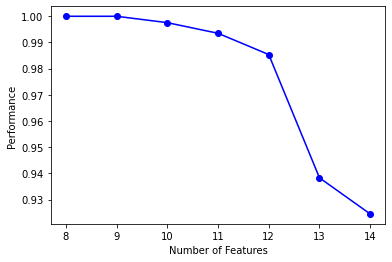

In [89]:
fig6 = plot_sfs(sfs4.get_metric_dict(), kind='std_dev')

In [90]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)

baseball_3

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,0,0.341,0.418
1228,706,626,93,0.321,0.394,0.268,0,0.321,0.382
1229,878,690,103,0.341,0.441,0.278,1,0.325,0.412
1230,774,664,84,0.335,0.394,0.271,0,0.328,0.398


In [75]:
sfs5 = sfs(KNeighborsClassifier(), k_features = 1, forward = False, floating = False, scoring = 'accuracy', cv = 0)

In [77]:
sfs5.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(), forward=False,
                          k_features=(1, 1), scoring='accuracy')

In [78]:
df_SFS5_results = pd.DataFrame(sfs5.subsets_).transpose()
df_SFS5_results

,feature_idx,cv_scores,avg_score,feature_names
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[0.9123376623376623],0.912338,"(RS, RA, W, OBP, SLG, BA, OOBP, OSLG)"
7,"(0, 2, 3, 4, 5, 6, 7)",[0.9237012987012987],0.923701,"(RS, W, OBP, SLG, BA, OOBP, OSLG)"
6,"(2, 3, 4, 5, 6, 7)",[0.924512987012987],0.924513,"(W, OBP, SLG, BA, OOBP, OSLG)"
5,"(2, 3, 5, 6, 7)",[0.9301948051948052],0.930195,"(W, OBP, BA, OOBP, OSLG)"
4,"(2, 3, 5, 7)",[0.9318181818181818],0.931818,"(W, OBP, BA, OSLG)"
3,"(2, 3, 7)",[0.9293831168831169],0.929383,"(W, OBP, OSLG)"
2,"(2, 3)",[0.9237012987012987],0.923701,"(W, OBP)"
1,"(2,)",[0.9058441558441559],0.905844,"(W,)"


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


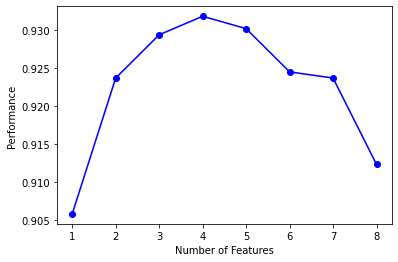

In [79]:
fig7 = plot_sfs(sfs5.get_metric_dict(), kind='std_dev')